In [30]:
import os
import datetime
import math
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import ewtpy

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [31]:
# DATA
df1 = pd.read_csv('data/data_day.csv')
df2 = pd.read_csv('data/data_2018-08-05_2021-04-30.csv')
df3 = pd.read_csv('data/data_2018-05-05_2018-08-04.csv')
df4 = pd.read_csv('data/data_2015-08-09_2018-05-04.csv')
df5 = pd.read_csv('data/data_2013-02-12_2015-08-08.csv')
df6 = pd.read_csv('data/data_2010-05-19_to_2013-02-11.csv')
df7 = pd.read_csv('data/data_2007-08-23_to_2010-05-18.csv')
df8 = pd.read_csv('data/data_2004-11-26_to_2007-08-22.csv')
# df_test = pd.read_csv('Hanoi 2024-01-22 to 2024-05-01.csv')
df = pd.concat([df6, df5, df4, df3, df2, df1])
df.index = range(0,len(df))
df.tail()
date_time = pd.concat([pd.to_datetime(df['datetime'][0:4000]),pd.to_datetime(df['datetime'][4000:])])
data_use = df[['temp','tempmax', 'tempmin','humidity', 'precip', 'windspeed', 'solarradiation', 'solarenergy']]

print(data_use)

      temp  tempmax  tempmin  humidity  precip  windspeed  solarradiation  \
0     30.8     36.5     26.0      78.1   0.000       20.5           301.4   
1     31.3     36.4     27.0      76.0   0.300       24.1           281.5   
2     30.7     39.0     26.0      76.1   2.300       40.7           237.1   
3     31.5     39.6     26.0      71.2   0.800       15.1           296.8   
4     27.6     30.8     25.8      80.1  33.000       22.7           240.8   
...    ...      ...      ...       ...     ...        ...             ...   
4991  20.5     22.0     19.5      93.8   8.794       17.5           148.7   
4992  22.4     26.5     20.0      84.5   0.683       19.4           140.8   
4993  22.6     26.6     20.0      85.5   0.072       20.3           131.9   
4994  23.0     26.0     19.0      82.4   3.300       20.5            63.7   
4995  16.0     18.0     14.0      91.4   3.400       22.3            15.8   

      solarenergy  
0            26.1  
1            24.3  
2            20

In [32]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s[1] - timestamp_s[0]

86400.0

C:\Users\tridu\AppData\Local\Temp\ipykernel_6212\1206436225.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_use['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
C:\Users\tridu\AppData\Local\Temp\ipykernel_6212\1206436225.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_use['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))


Index(['temp', 'tempmax', 'tempmin', 'humidity', 'precip', 'windspeed',
       'solarradiation', 'solarenergy', 'Year sin', 'Year cos'],
      dtype='object')

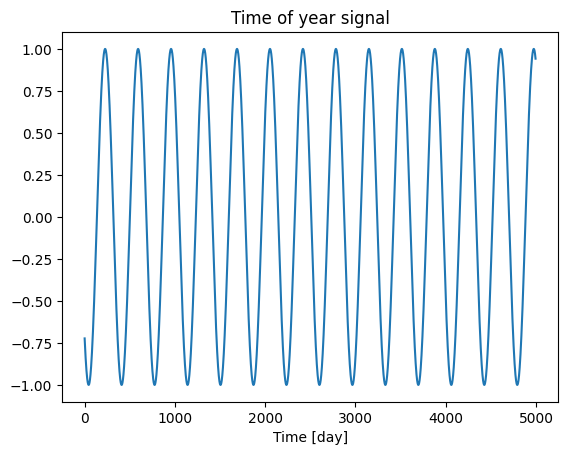

In [33]:
# PERIOD TIME

day = 24*60*60
year = (365.2425)*day
# df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
# df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
data_use['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
data_use['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

# plt.plot(np.array(df['Year sin'])[:366])
plt.plot(np.array(data_use['Year cos'])[:])
plt.xlabel('Time [day]')
plt.title('Time of year signal')
data_use.columns

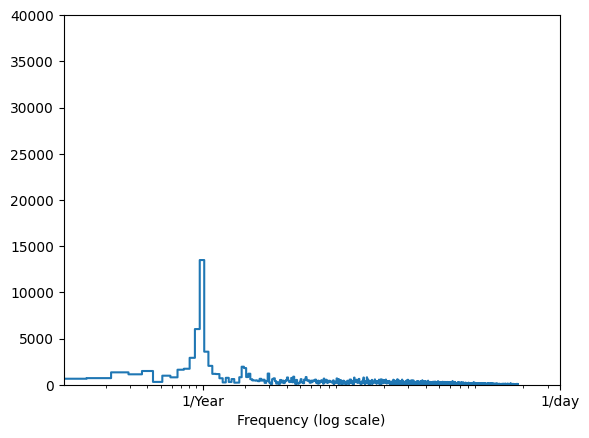

In [34]:
fft = tf.signal.rfft(data_use['temp'])
f_per_dataset = np.arange(0, len(fft))

n_samples_day = len(data_use['humidity'])
days_per_year = 365.2524
years_per_dataset = n_samples_day/(days_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 40000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [73]:
num_mode = 5
def decompose_to_ewt(data):
    temp_data,  mfb ,boundaries = ewtpy.EWT1D(data, N = num_mode)
    return temp_data, mfb, boundaries
def split_mode(ewt):
    modes = []*num_mode
    for i in range(num_mode):
        modes[i] = [m for m in ewt[:,i]]
    return modes

(4996, 5)


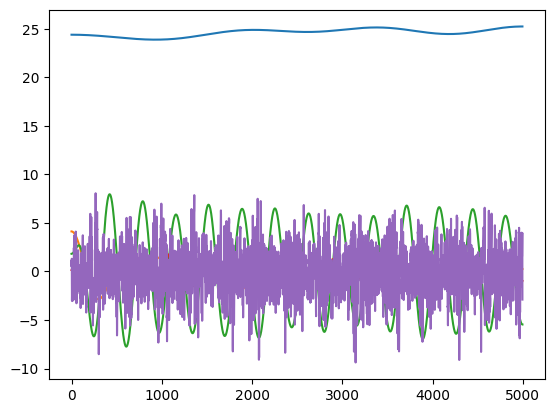

In [74]:
temp_ewt,_,_ = decompose_to_ewt(data_use['temp'])
plt.plot(temp_ewt)
print(temp_ewt.shape) 

In [76]:
temp_ewt_transpose = np.transpose(temp_ewt)
for i in range(num_mode):
    data_use['temp_ewt'+str(i)] = temp_ewt_transpose[i]

C:\Users\tridu\AppData\Local\Temp\ipykernel_6212\3408805903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_use['temp_ewt'+str(i)] = temp_ewt_transpose[i]


In [77]:
data_use.columns

Index(['temp', 'tempmax', 'tempmin', 'humidity', 'precip', 'windspeed',
       'solarradiation', 'solarenergy', 'Year sin', 'Year cos', 'temp_ewt0',
       'temp_ewt1', 'temp_ewt2', 'temp_ewt3', 'temp_ewt4'],
      dtype='object')

In [78]:
number_train = int(data_use.shape[0] * 0.8)
train, test = data_use[0:number_train], data_use[number_train:]

In [79]:
def create_data(in_steps, out_steps, data, features):
    X = []
    y = []
    for i in range(len(data)-in_steps-out_steps):
        X.append(data[i:i+in_steps])
        y.append(data[i+in_steps:i+in_steps+out_steps][features])
    return np.array(X), np.array(y)
def normalize(data, train_mean, train_std):
    data_norm = (data - train_mean)/train_std
    return data_norm
def unnormalize(data, train_mean, train_std):
    data_unnorm = (data * train_std) + train_mean
    return data_unnorm


In [80]:
in_steps = 365
out_steps = 7
features_train = ['temp']*len(data_use.columns)
num_features = len(features_train) 

In [81]:
X_train, y_train = create_data(in_steps, out_steps, train, features_train)
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1], num_features)

X_test, y_test = create_data(in_steps, out_steps, test, features_train)
y_test = y_test.reshape(y_test.shape[0], y_test.shape[1], num_features)

X_train_norm = normalize(X_train, X_train.mean(), X_train.std())
y_train_norm = normalize(y_train, y_train.mean(), y_train.std())

X_test_norm = normalize(X_test, X_train.mean(), X_train.std())
y_test_norm = normalize(y_test, y_train.mean(), y_train.std())

print(X_train_norm.shape, y_train_norm.shape, X_test_norm.shape, y_test_norm.shape)


(3624, 365, 15) (3624, 7, 15) (628, 365, 15) (628, 7, 15)


In [40]:
print(X_train_norm[:5])

[[[-0.11968975 -0.01912371 -0.20437695 ... -0.20261263 -0.65091322
   -0.67585785]
  [-0.11086817 -0.02088803 -0.18673378 ... -0.23437033 -0.6511345
   -0.67606559]
  [-0.12145407  0.0249842  -0.20437695 ... -0.30141436 -0.65135931
   -0.67626949]
  ...
  [-0.2414276  -0.20437695 -0.27494961 ... -0.53959709 -0.65022087
   -0.67515862]
  [-0.22378443 -0.13380429 -0.29259278 ... -0.3808086  -0.65043022
   -0.67537837]
  [-0.199084   -0.11263249 -0.27494961 ... -0.19379105 -0.65064332
   -0.67559449]]

 [[-0.11086817 -0.02088803 -0.18673378 ... -0.23437033 -0.6511345
   -0.67606559]
  [-0.12145407  0.0249842  -0.20437695 ... -0.30141436 -0.65135931
   -0.67626949]
  [-0.10733954  0.0355701  -0.20437695 ... -0.2096699  -0.6515876
   -0.67646949]
  ...
  [-0.22378443 -0.13380429 -0.29259278 ... -0.3808086  -0.65043022
   -0.67537837]
  [-0.199084   -0.11263249 -0.27494961 ... -0.19379105 -0.65064332
   -0.67559449]
  [-0.20261263 -0.14262587 -0.25730644 ... -0.45138126 -0.6508601
   -0.6758

In [42]:
print(X_train_norm.shape, y_train_norm.shape, X_test_norm.shape, y_test_norm.shape)

(3624, 10, 365) (3624, 10, 7) (628, 10, 365) (628, 10, 7)


In [82]:
model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Reshape([num_features*in_steps]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(out_steps*num_features, kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([out_steps, num_features])
])



In [83]:
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Lion(learning_rate = 0.001),
)

In [84]:
history = model.fit(X_train_norm, y_train_norm, epochs=5, validation_split=0.2, batch_size=32, validation_batch_size=32)

Epoch 1/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.8032 - val_loss: 0.2770
Epoch 2/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.2641 - val_loss: 0.2936
Epoch 3/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.2298 - val_loss: 0.2630
Epoch 4/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.2232 - val_loss: 0.2669
Epoch 5/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.2165 - val_loss: 0.2605


In [85]:
model.evaluate(X_test_norm, y_test_norm)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2079


0.25742846727371216

In [86]:
model_name = "FINAL_ANN_EWT_365_7.keras"
model.save(f"model_final/{model_name}")

In [87]:
model_recall = tf.keras.models.load_model(f"model_final/{model_name}")

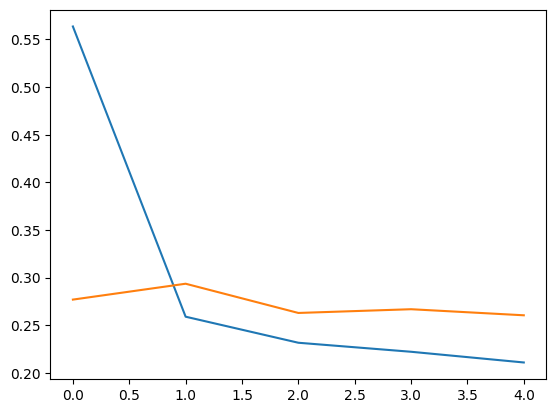

In [88]:
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])

In [89]:
predictions = model_recall.predict(X_test_norm)
predict_unnorm = unnormalize(predictions, y_train.mean(), y_train.std())
y_test_unnorm = unnormalize(y_test_norm, y_train.mean(), y_train.std())
feature = 0


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


Day:  1
MAE:  1.9069053990066431
MSE:  6.220759121897531
CORR:  0.8521612419694249
Day:  2
MAE:  1.9687082718891702
MSE:  6.648464614854316
CORR:  0.8443480245963983
Day:  3
MAE:  2.010449811911127
MSE:  6.853851139714705
CORR:  0.8370526179873025
Day:  4
MAE:  2.0287413484731296
MSE:  7.011054905962025
CORR:  0.8321027479727642
Day:  5
MAE:  2.057919051237167
MSE:  7.209371348431129
CORR:  0.8267718990710647
Day:  6
MAE:  2.0870031563339717
MSE:  7.39229260070241
CORR:  0.8209317451837168
Day:  7
MAE:  2.136796662154471
MSE:  7.730055725736139
CORR:  0.81286699205388


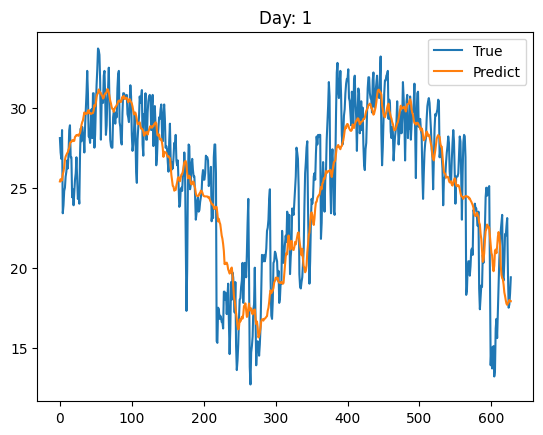

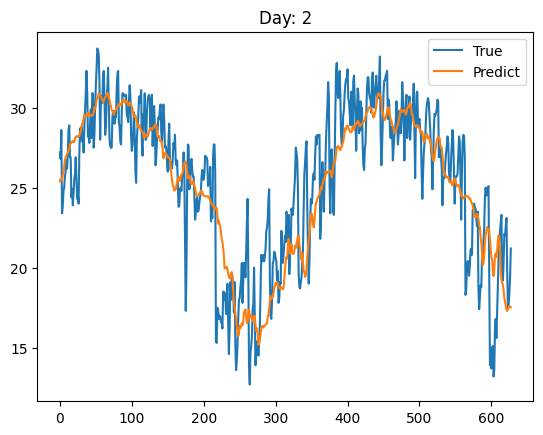

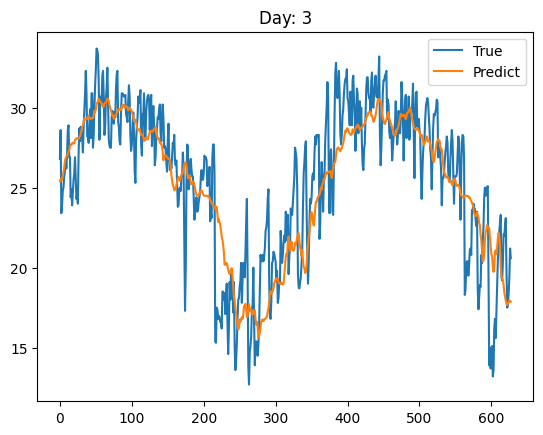

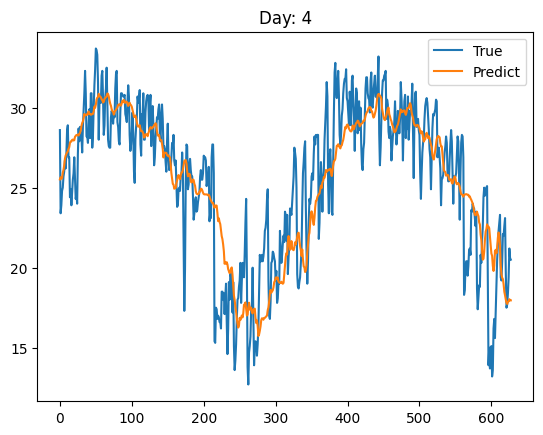

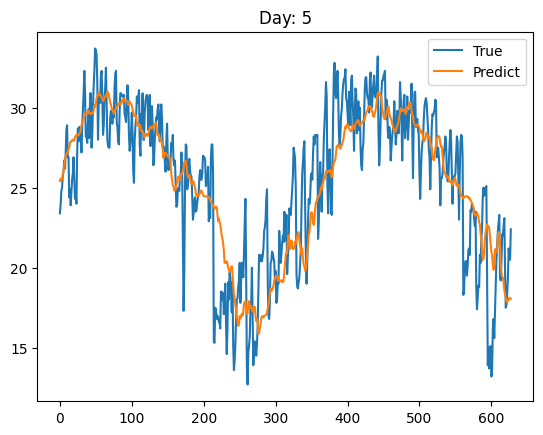

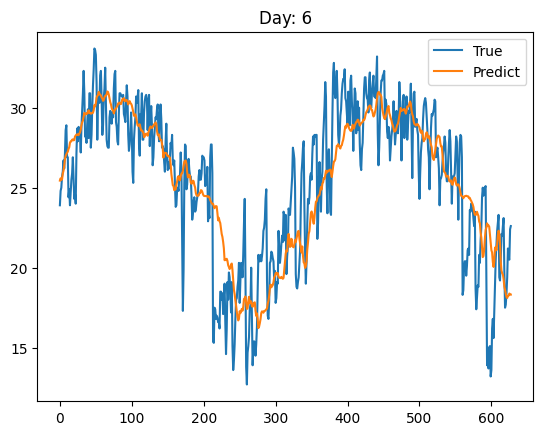

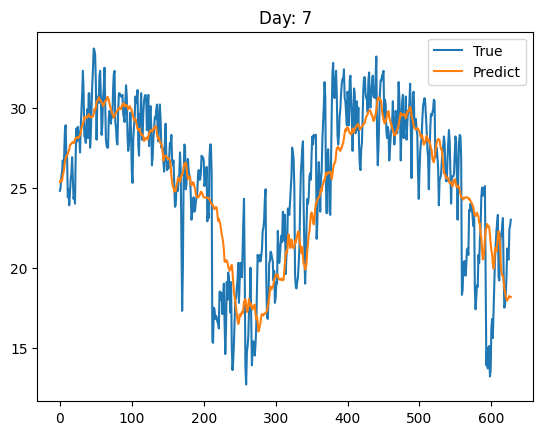

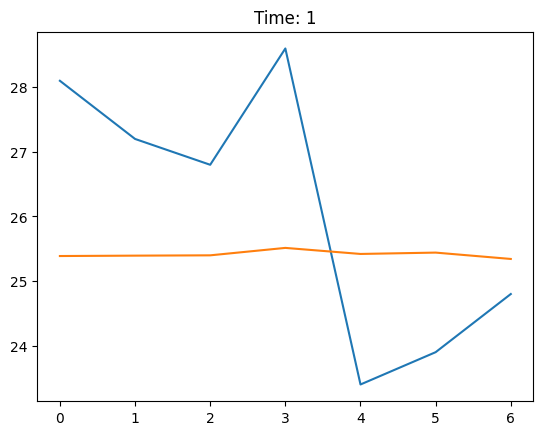

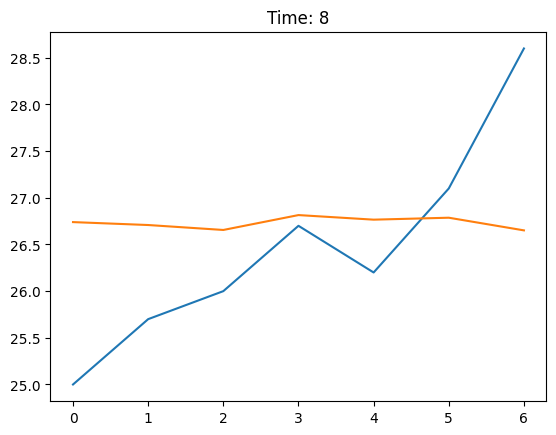

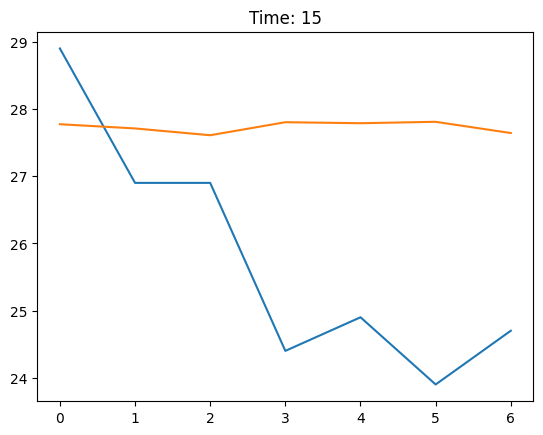

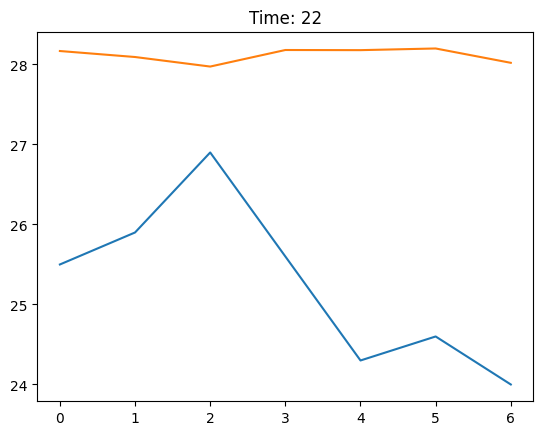

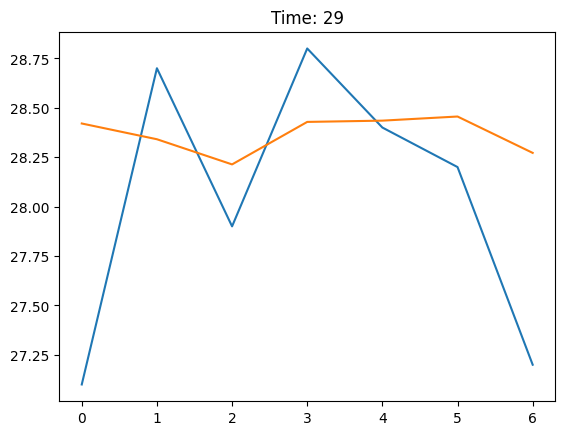

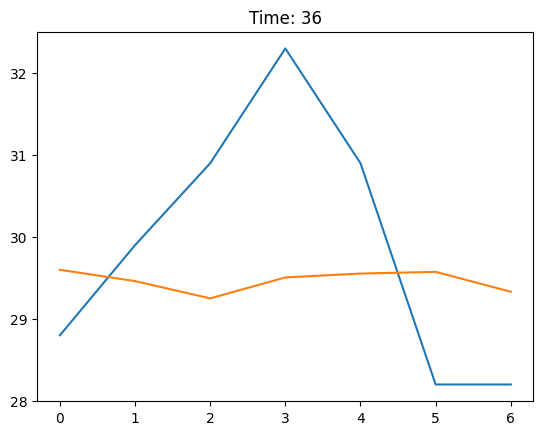

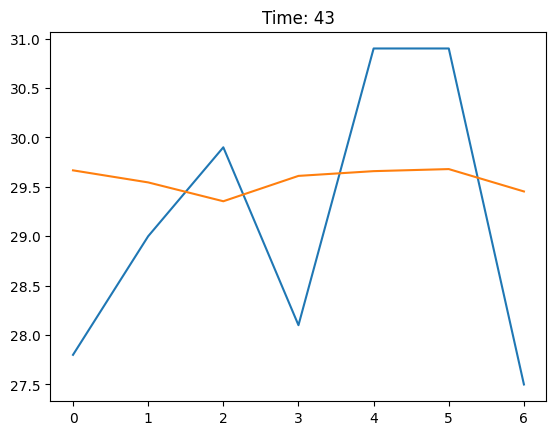

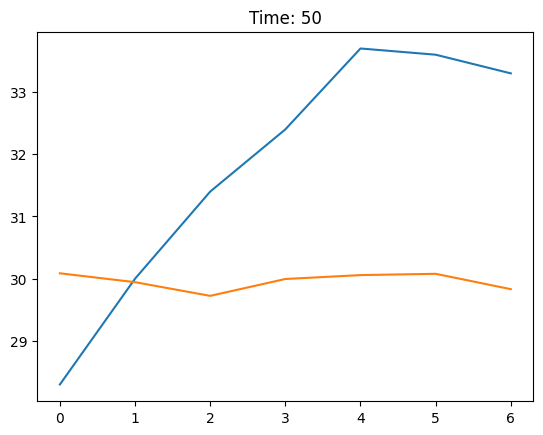

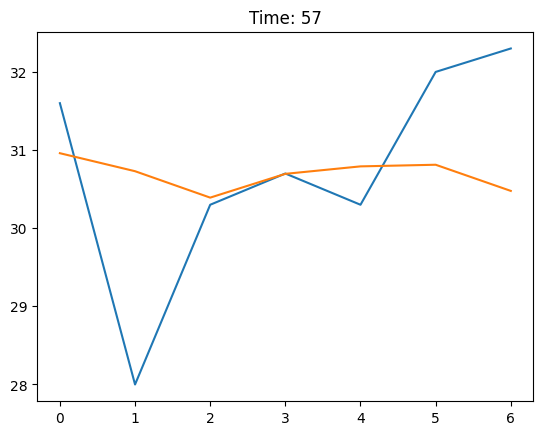

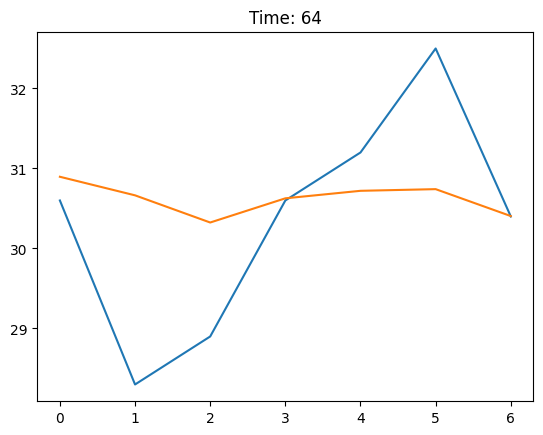

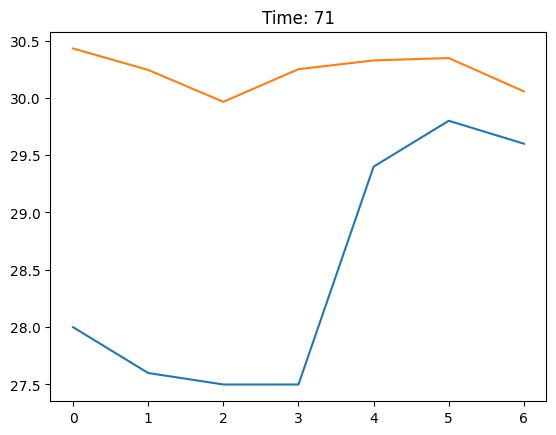

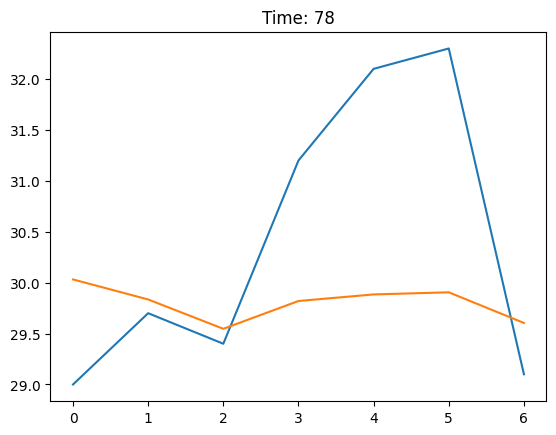

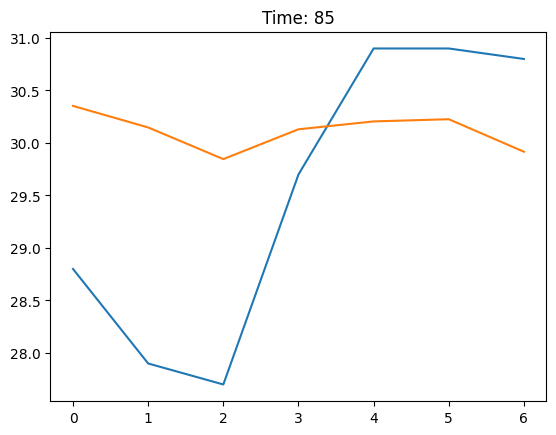

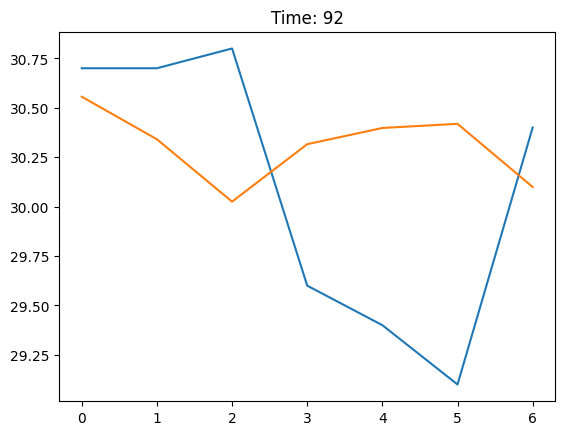

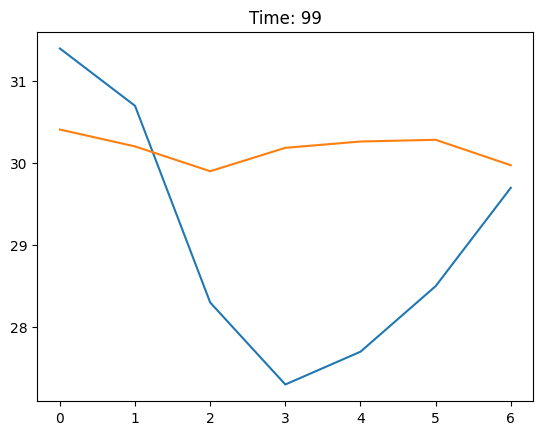

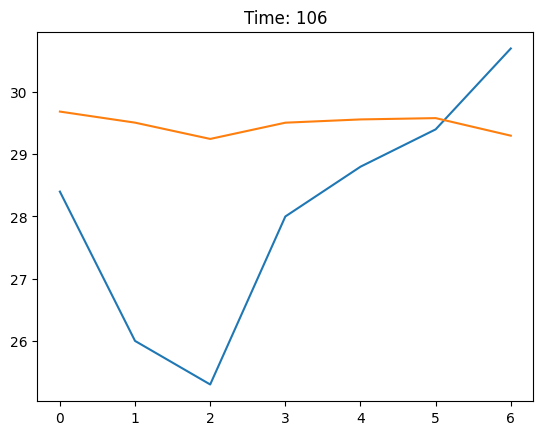

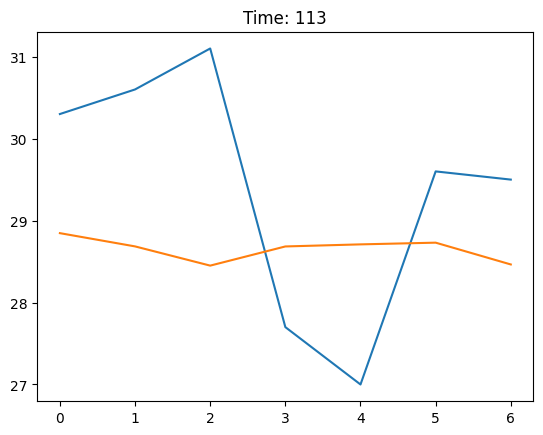

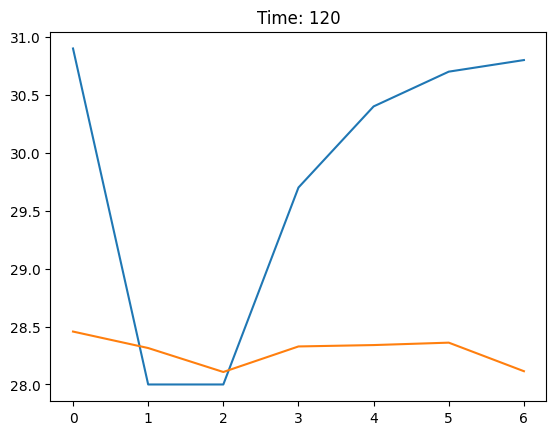

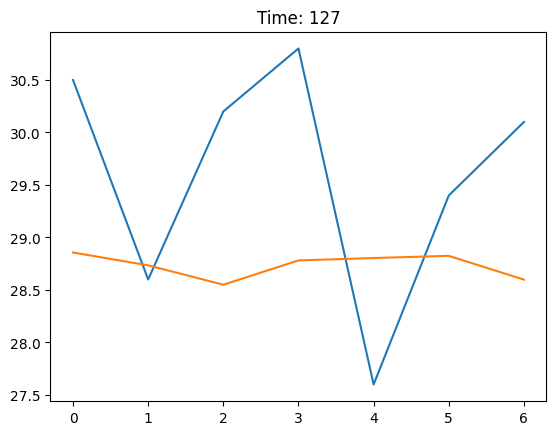

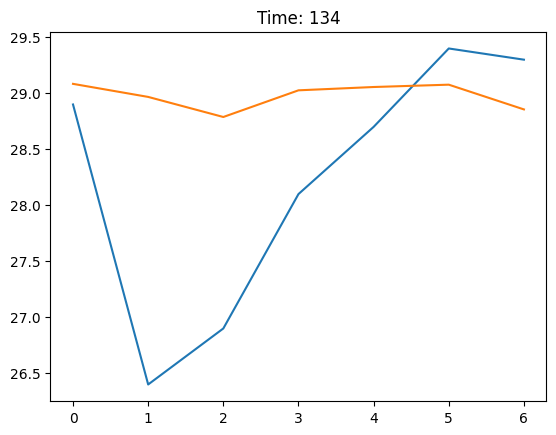

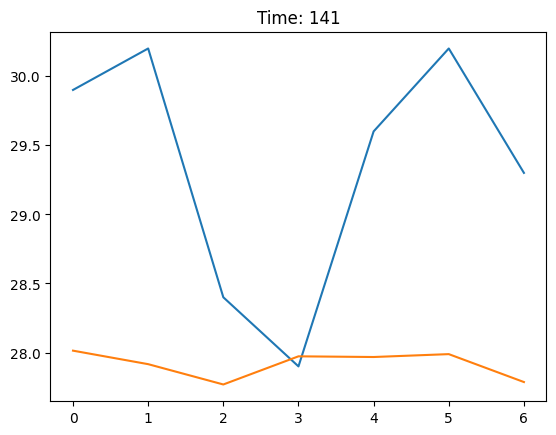

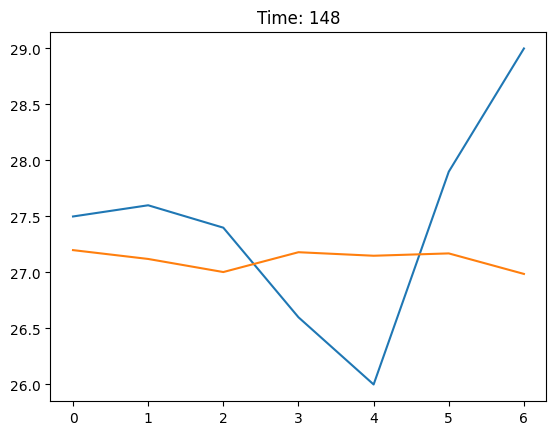

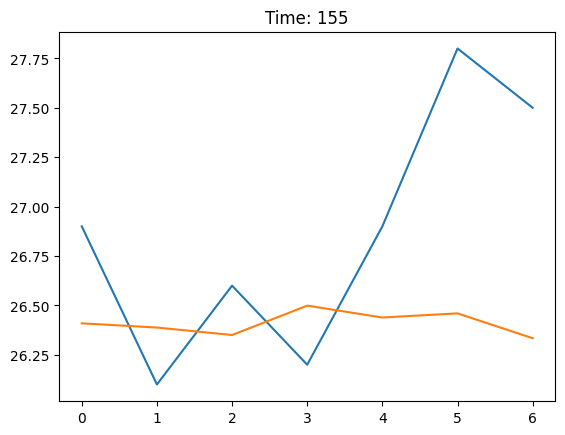

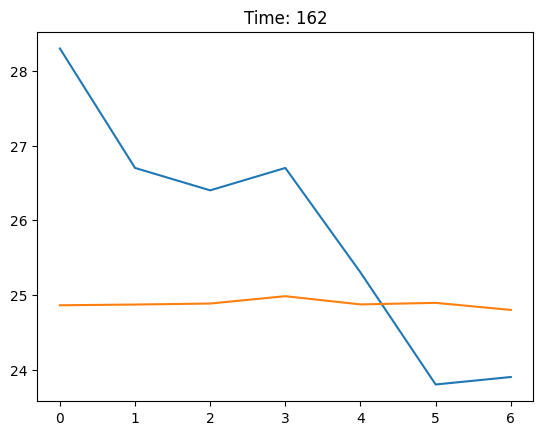

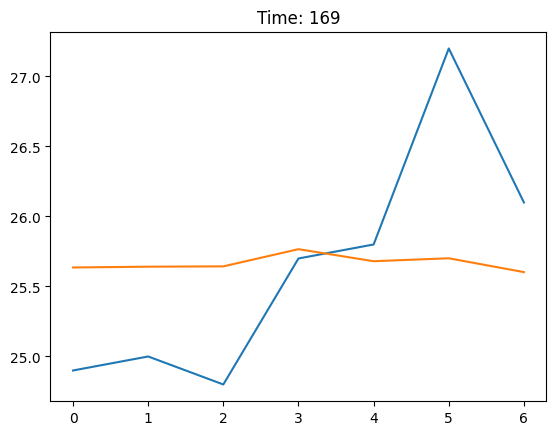

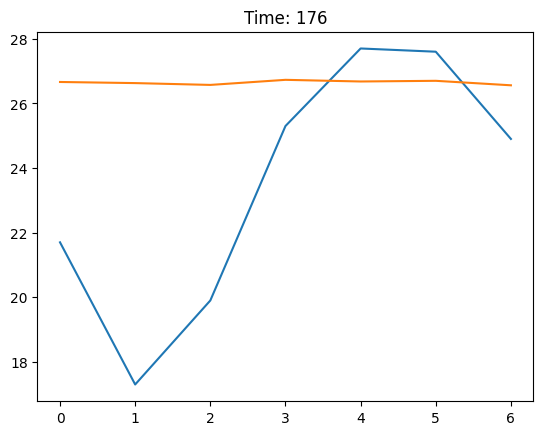

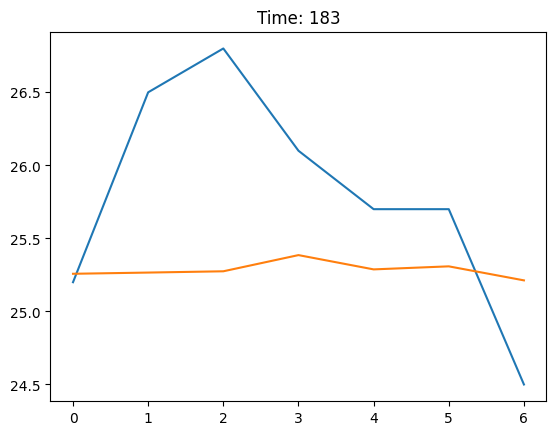

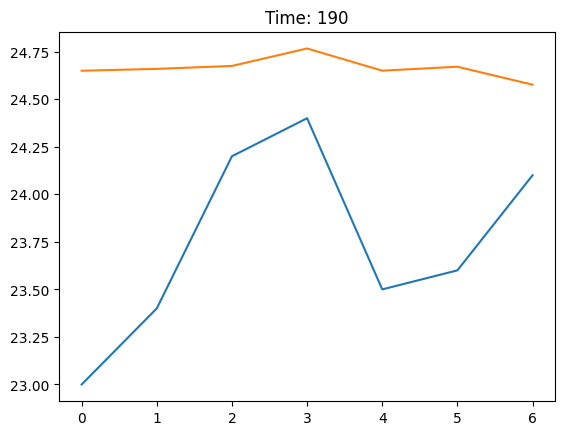

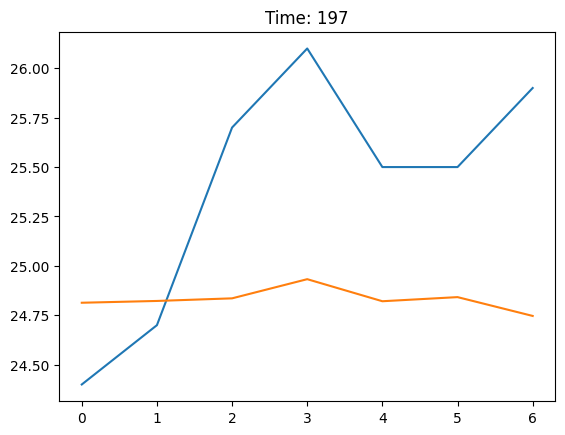

In [90]:
for i in range(out_steps):
    print('Day: ', i+1)
    print('MAE: ', mean_absolute_error(y_test_unnorm[:,i,feature], predict_unnorm[:,i,feature]))
    print('MSE: ', mean_squared_error(y_test_unnorm[:,i,feature], predict_unnorm[:,i,feature]))
    print('CORR: ', np.corrcoef(y_test_unnorm[:,i,feature], predict_unnorm[:,i,feature])[0,1])
for i in range(out_steps):
    plt.title('Day: ' + str(i+1))
    plt.plot(y_test_unnorm[:,i,feature])
    plt.plot(predict_unnorm[:,i,feature])
    plt.legend(['True', 'Predict'])
    plt.show()
for i in range(0, 200, out_steps):
    plt.title('Time: ' + str(i+1))
    plt.plot(y_test_unnorm[i,:,feature])
    plt.plot(predict_unnorm[i,:,feature])
    plt.show()
    

In [60]:
predict = model.predict(X_test_norm)
predict_unnorm = unnormalize(predict, y_train.mean(), y_train.std())
y_test_unnorm = unnormalize(y_test_norm, y_train.mean(), y_train.std())
for i in range(14):
    print('Day: ', i+1)
    print('MAE: ', mean_absolute_error(y_test_unnorm[:,i,0], predict_unnorm[:,i,0]))
    print('MSE: ', mean_squared_error(y_test_unnorm[:,i,0], predict_unnorm[:,i,0]))
    print('CORR: ', np.corrcoef(y_test_unnorm[:,i,0], predict_unnorm[:,i,0])[0,1])
for i in range(14):
    plt.title('Day: ' + str(i+1))
    plt.plot(y_test_unnorm[:,i,0])
    plt.plot(predict_unnorm[:,i,0])
    plt.legend(['True', 'Predict'])
    plt.show()
for i in range(0, 200, 14):
    plt.title('Time: ' + str(i+1))
    plt.plot(y_test_unnorm[i,:,0])
    plt.plot(predict_unnorm[i,:,0])
    plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Day:  1
MAE:  1.1991872546680742
MSE:  2.5220922238475607
CORR:  0.9499375918640894
Day:  2
MAE:  1.662975104913891
MSE:  4.555002420485512
CORR:  0.9082385045910583
Day:  3
MAE:  1.8576092152896513
MSE:  5.602050655492296
CORR:  0.8860264549154626
Day:  4
MAE:  1.9549582414848858
MSE:  6.024363672611226
CORR:  0.8774668261243131
Day:  5
MAE:  2.0106116352947314
MSE:  6.342143321448441
CORR:  0.8706946207310629
Day:  6
MAE:  2.067119338372485
MSE:  6.7229986836824365
CORR:  0.865046908003836
Day:  7
MAE:  2.07987946376188
MSE:  6.857402683923122
CORR:  0.8602580935393919
Day:  8


IndexError: index 7 is out of bounds for axis 1 with size 7